### Points

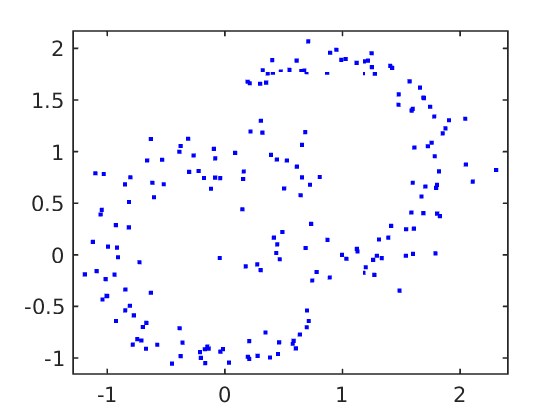

N =

   192


In [2]:
load('Points.mat')
N=size(points,1)
plot(points(:,1),points(:,2),'b.');
xlim([min(points(:,1))-0.1,max(points(:,1))+0.1]);
ylim([min(points(:,2))-0.1,max(points(:,2))+0.1]);

### Graph

In [ ]:
function [G, W] = constructGraph(points,K,sigma)
    N=size(points,1);
    G = zeros(N);
    W = zeros(N);
    for i=1:N
        dists = zeros(1,N);
        for j=1:N
            dists(j) = norm(points(i,:)-points(j,:));
        end
        [B,I] = sort(dists);
        for k=2:K+1
            G(i,I(k))=1;
            G(I(k),i)=1;
            W(i,I(k))=exp(-0.5*(B(k)/sigma)^2);
            W(I(k),i)=W(i,I(k));
        end
    end
end

function plotGraph(points,G)
    plot(points(:,1),points(:,2),'b.');
    hold on;
    for i=1:N
        for j=i:N
            if G(i,j) == 1
                x = [points(i,1),points(j,1)]';
                y = [points(i,2),points(j,2)]';
                plot(x,y,'b');
            end
        end
    end
end


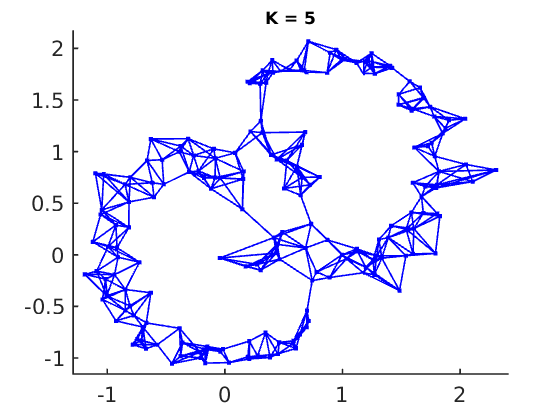

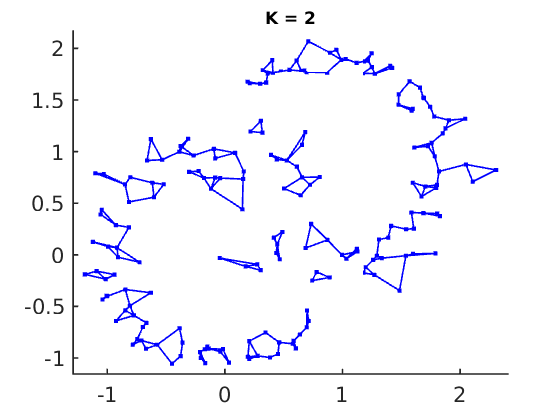

In [17]:
K=2;
sigma = 0.3;
[G, W] = constructGraph(points,K,sigma);
figure;
plotGraph(points,G);
xlim([min(points(:,1))-0.1,max(points(:,1))+0.1]);
ylim([min(points(:,2))-0.1,max(points(:,2))+0.1]);
title(sprintf('K = %d',K),'FontSize', 8);

K=5;
figure;
[G, W] = constructGraph(points,K,sigma);
plotGraph(points,G);
xlim([min(points(:,1))-0.1,max(points(:,1))+0.1]);
ylim([min(points(:,2))-0.1,max(points(:,2))+0.1]);
title(sprintf('K = %d',K),'FontSize', 8);

### The smallest eigenvalue

In [ ]:
d = sum(G,2) ;
D = diag(d) ;
L = D-G;

V = rand(N,1);
V = V/norm(V);

epsilon = 1e-10;
delta = 1;
Vprev = V;
lambda = 1;
count = 1;
while epsilon < delta
    V = L\Vprev;
    lambda = transpose(V)*L*V;
    V = V/lambda;
    delta = norm(Vprev-V);
    Vprev = V;
    count = count+1;
end
eig(L)
1/lambda